<a href="https://colab.research.google.com/github/sarthak684/DataAnalytics/blob/Main-Data/Mileage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project**

Mileage Prediction

**Objective**

This model predicts the fuel consumption(Mileage) of differnt vechicles by taking different attributes such as Horse Power, Weight, Cyliners, Displacement, Acceleration etc .

**Data Source**

This data source was taken from the Statlib Library which is maintained at Carneige Mellon University.

**Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

**Import Data**

In [5]:
dataset = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

**Describe Data**

In [6]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Data Preprocessing**

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
dataset.corr()

<ipython-input-10-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


**Remove Missing Values**

In [11]:
dt = dataset.dropna()

In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Data Visualization**

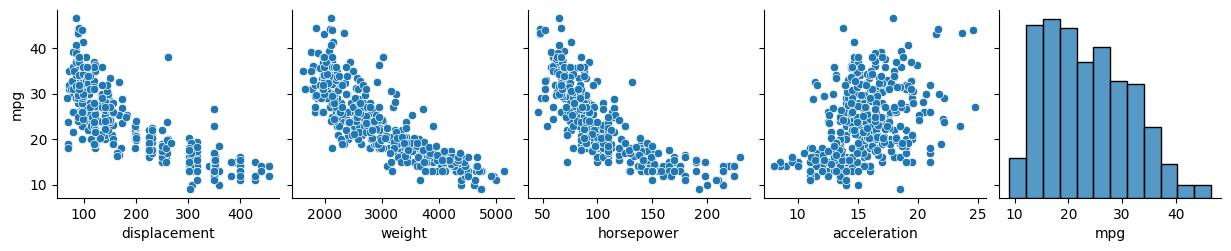

In [13]:
sns.pairplot(dt, x_vars=['displacement','weight','horsepower','acceleration','mpg'], y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

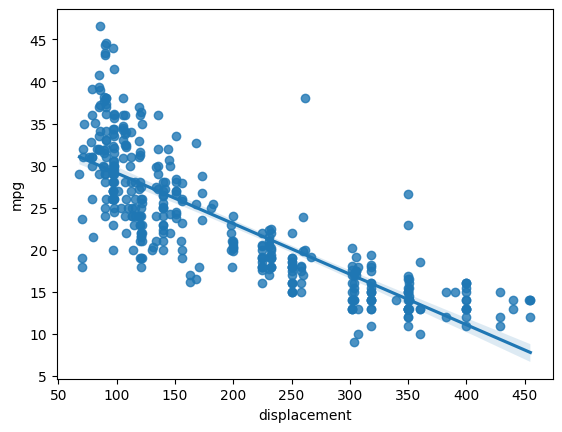

In [14]:
sns.regplot(x='displacement',y='mpg',data=dt)

**Define Target Variable (y) and Feature Variables (X)**

In [15]:
dt.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y=dt['mpg']

In [17]:
y.shape

(392,)

In [18]:
x=dt[['horsepower','displacement','weight','acceleration']]

In [19]:
x.shape

(392, 4)

In [20]:
x

,horsepower,displacement,weight,acceleration
0,130.0,307.0,3504,12.0
1,165.0,350.0,3693,11.5
2,150.0,318.0,3436,11.0
3,150.0,304.0,3433,12.0
4,140.0,302.0,3449,10.5
...,...,...,...,...
393,86.0,140.0,2790,15.6
394,52.0,97.0,2130,24.6
395,84.0,135.0,2295,11.6
396,79.0,120.0,2625,18.6


**Scaling Data**

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler()

In [24]:
x=ss.fit_transform(x)

In [25]:
x

array([[ 0.66413273,  1.07728956,  0.62054034, -1.285258  ],
       [ 1.57459447,  1.48873169,  0.84333403, -1.46672362],
       [ 1.18439658,  1.1825422 ,  0.54038176, -1.64818924],
       ...,
       [-0.53247413, -0.56847897, -0.80463202, -1.4304305 ],
       [-0.66254009, -0.7120053 , -0.41562716,  1.11008813],
       [-0.58450051, -0.72157372, -0.30364091,  1.40043312]])

In [27]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-1.812609e-16,-7.250436e-17,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.520975e+00,-1.209563e+00,-1.608575e+00,-2.736983e+00
25%,-7.665929e-01,-8.555316e-01,-8.868535e-01,-6.410551e-01
50%,-2.853488e-01,-4.153842e-01,-2.052109e-01,-1.499869e-02
75%,5.600800e-01,7.782764e-01,7.510927e-01,5.384714e-01
max,3.265452e+00,2.493416e+00,2.549061e+00,3.360262e+00


**Train Test Split**

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=2528)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

**Modelling**

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model=LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

**Model Evaluation**

In [35]:
model.coef_

array([-1.5073512 , -0.86748555, -4.21745767, -0.0293279 ])

In [36]:
model.intercept_

23.293483289690105

**Prediction**

In [37]:
y_pred = model.predict(x_test)

In [38]:
y_pred

array([32.13724552, 15.67618523, 30.49901954, 22.68645533, 13.15475014,
       25.28126778, 27.56343237, 28.97272093, 16.8982782 , 24.07032426,
       30.19248873, 12.44960827, 22.70807395, 25.40129137, 28.08354642,
       24.35425285, 28.51966758, 27.1020678 , 31.46698769, 11.66656528,
       21.36852231, 24.89193036, 24.15279731, 23.79472335, 24.46643479,
       31.77114219, 30.02358408, 21.04606415, 13.68335645, 30.74634776,
       30.49680343, 11.57008425, 28.55739346, 13.5732912 , 28.18406191,
       21.94652949, 18.09418528, 30.67338039, 16.63378761, 26.77968437,
       29.5936272 , 27.59571357, 26.63015158, 29.76540426, 30.30942562,
       16.96844316, 23.99595078, 24.54139432, 27.01161638, 28.75337746,
       29.2779442 , 14.23217846, 30.73020174, 27.81318812, 26.73541235,
       12.46369164, 29.00279987, 27.63694122, 14.85659877, 24.73548591,
       21.61392656, 29.66527329, 14.94917486, 11.08465068, 30.70145369,
       19.59530419, 14.23830999, 14.94913304, 13.22106091, 17.18

**Explanation**

In [48]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [49]:
mean_absolute_error(y_test,y_pred)

3.2826631852035733

In [50]:
mean_absolute_percentage_error(y_test,y_pred)

0.13693631783012505

In [51]:
r2_score(y_test,y_pred)

0.7211796239665333